In [0]:
## Cell 0 ##

cat_list=["comp.graphics","rec.sport.hockey","sci.med","sci.space","talk.politics.misc"]
import pickle

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# UNCOMMENT these three pickle files for executing the code for (80:20) split. Give path to the pickled files.  #

#pickle_in = open("PATH OF classes_list(80:20).pickle FILE","rb")
#classes_list =pickle.load(pickle_in)

#pickle_in = open("PATH OF Global(80:20).pickle FILE","rb")
#GLOBAL =pickle.load(pickle_in)

#pickle_in = open("PATH OF classes_test_list(80:20).pickle FILE","rb")
#classes_test_list =pickle.load(pickle_in)

#pickle_in = open("PATH OF tf_idf(80:20).pickle FILE","rb")
#tf_idf =pickle.load(pickle_in)



#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++






#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# UNCOMMENT these three pickle files for executing the code for 70:30 split. Give path to the pickled files. #

#pickle_in = open("PATH OF classes_list(70:30).pickle FILE","rb")
#classes_list =pickle.load(pickle_in)

#pickle_in = open("PATH OF Global(70:30).pickle FILE","rb")
#GLOBAL =pickle.load(pickle_in)

#pickle_in = open("PATH OF classes_test_list(70:30).pickle FILE","rb")
#classes_test_list =pickle.load(pickle_in)

#pickle_in = open("PATH OF tf_idf(70:30).pickle FILE","rb")
#tf_idf =pickle.load(pickle_in)



#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++





#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# UNCOMMENT these three pickle files for executing the code for (50:50) split. Give path to the pickled files. #

#pickle_in = open("PATH OF classes_list(50:50).pickle FILE","rb")
#classes_list =pickle.load(pickle_in)

#pickle_in = open("PATH OF Global(50:50).pickle FILE","rb")
#GLOBAL =pickle.load(pickle_in)

#pickle_in = open("PATH OF classes_test_list(50:50).pickle FILE","rb")
#classes_test_list =pickle.load(pickle_in)

#pickle_in = open("PATH OF tf_idf(50:50).pickle FILE","rb")
#tf_idf =pickle.load(pickle_in)


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Execution sequence of this python  code using pickled results

# Cell 1 --> Cell 2 --> Cell 3 -->Cell 4-->cell 11-->cell 12-->cell 14--->Cell 15--> Cell 16 --> Cell 18-->Cell 19--->Cell 20
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [0]:
### Cell 1 ###
##importing  nltk##

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#Cell 2 #
##installing num2words ##
pip install num2words

     |████████████████████████████████| 102kB 2.8MB/s 


In [0]:
#Cell 3 #

#Importing all esentials#
from nltk.stem import PorterStemmer 
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize 
import numpy as np
import glob
from collections import Counter 
  
import os
from num2words import num2words
from nltk.corpus import stopwords 
import pickle
import math
import operator
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt 
import random 
from sklearn.model_selection import train_test_split
import pandas as pd  
from sklearn.utils import shuffle
ps = PorterStemmer() 
tokenizer = RegexpTokenizer(r'\w+')


In [0]:
## CELL 4  ##
## Download stopwords ##

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
## Cell 5 ##
##Splitting into Test & Train RANDOMLY using Test Train Split and shuffle ###

Data=pd.DataFrame(columns = ["file_name", "class"])
cat_list=["comp.graphics","rec.sport.hockey","sci.med","sci.space","talk.politics.misc"]


for group in cat_list:
  for filename in glob.glob("drive/My Drive/IR4/"+group+"/*"):
    
    length=len(filename)
    j=0
    for k in range(length-1,-1,-1):
      if filename[k]=='/':
        j=k
        break
  
    Data=Data.append({"file_name":filename[j+1:len(filename)],"class":group},ignore_index=True)
##Shuffling and split ##
Data = shuffle(Data)
x=Data["file_name"]
y=Data["class"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.5, random_state = 12)



In [0]:
## Cell 6 ##
#pickle_out = open("drive/My Drive/xTest(70:30).pickle","wb")
#pickle.dump(xTest, pickle_out)
#pickle_out.close()


In [0]:
##  Cell 7 ##
# # Train Data pre processing ##
stop_words = set(stopwords.words('english')) 
cat_list=["comp.graphics","rec.sport.hockey","sci.med","sci.space","talk.politics.misc"]
GLOBAL=[]
classes_list={}
for group in cat_list:
  global_doc=[]
  for filename in glob.glob("drive/My Drive/IR4/"+group+"/*"):
    
    length=len(filename)
    j=0
    for k in range(length-1,-1,-1):
      if filename[k]=='/':
        j=k
        break
    print(filename[j+1:len(filename)])
    if filename[j+1:len(filename)] in list(xTrain):
      if not os.path.isdir(filename):
        text = open(filename,"r+",errors='ignore') 
        var=(text.read())
        var=var.replace(',','')
        words_tokens=tokenizer.tokenize(var)
        words = [w for w in words_tokens if not w in stop_words] 
      
        Words=[]
        for w in words:
          if w.isdigit():
            Words.append(ps.stem(num2words(w)))
            GLOBAL.append(ps.stem(num2words(w)))
          else:
            Words.append(ps.stem(w))
            GLOBAL.append(ps.stem(w))
      global_doc.append(Words)
  classes_list.update({group:global_doc})






Streaming output truncated to the last 5000 lines.
38703
38708
38711
38704
38710
38706
38712
38707
38705
38709
38716
38714
38713
38720
38717
38719
38721
38715
38718
38722
38723
38726
38731
38732
38727
38730
38725
38724
38728
38729
38735
38737
38736
38742
38739
38740
38733
38738
38741
38734
38749
38752
38747
38744
38745
38743
38748
38751
38750
38746
38753
38757
38754
38762
38759
38758
38760
38756
38761
38755
38763
38766
38767
38768
38764
38770
38771
38772
38769
38765
38773
38775
38777
38774
38776
38778
38781
38780
38782
38779
38783
38792
38784
38787
38785
38786
38789
38788
38790
38791
38800
38802
38799
38793
38796
38801
38794
38795
38798
38797
38808
38810
38807
38804
38805
38811
38806
38809
38803
38812
38813
38822
38814
38819
38817
38815
38816
38821
38820
38818
38823
38828
38827
38832
38826
38825
38831
38829
38830
38824
38833
38838
38839
38837
38840
38836
38834
38841
38835
38842
38843
38847
38848
38846
38851
38849
38845
38844
38850
38852
38858
38862
38853
38859
38854
38861
38857
38855
3

In [0]:
## Cell 8 ##
#pickle_out = open("drive/My Drive/Global(70:30).pickle","wb")
#pickle.dump(GLOBAL, pickle_out)
#pickle_out.close()


#pickle_out = open("drive/My Drive/classes_list(70:30).pickle","wb")
#pickle.dump(classes_list, pickle_out)
#pickle_out.close()


In [0]:
## Cell 9 ##

### Feature Selection using TF-IDF ###

tf_idf=[]

Global_unique=np.unique(GLOBAL)

for term in Global_unique:
  df=0
  for key in classes_list.keys():
    docs=classes_list.get(key)
    for doc in docs:
      if term in doc:
        df=df+1
        break
  #print(df,term)
  df=math.log((5/df),10)  

  for clas in cat_list:
    tf=0
    docs=classes_list.get(clas)
    for doc in docs:
      tf=tf+doc.count(term)
    
    tf=1+math.log((tf+1),10)
    print(tf*df,term)
    tf_idf.append(tuple([term,clas,tf*df]))


##pickle_out = open("drive/My Drive/tf_idf(70:30).pickle","wb")
##pickle.dump(tf_idf, pickle_out)
##pickle_out.close()


Streaming output truncated to the last 5000 lines.
0.6989700043360187 weiss
0.9093809417105434 weiss
0.6989700043360187 weiss
0.6989700043360187 weiss
0.6989700043360187 weissberg
0.6989700043360187 weissberg
0.6989700043360187 weissberg
0.6989700043360187 weissberg
0.9093809417105434 weissberg
0.9093809417105434 weit
0.6989700043360187 weit
0.6989700043360187 weit
0.6989700043360187 weit
0.6989700043360187 weit
0.676088138259007 weitek
0.3979400086720376 weitek
0.3979400086720376 weitek
0.3979400086720376 weitek
0.7075975239978616 weitek
0.6989700043360187 weizel
0.6989700043360187 weizel
0.6989700043360187 weizel
0.6989700043360187 weizel
0.9093809417105434 weizel
0.6989700043360187 weizmann
0.6989700043360187 weizmann
0.9093809417105434 weizmann
0.6989700043360187 weizmann
0.6989700043360187 weizmann
1.4268722539965615 welch
0.6989700043360187 welch
0.6989700043360187 welch
0.6989700043360187 welch
0.6989700043360187 welch
1.365956895296437 welchgat
0.6989700043360187 welchgat
0.698

In [0]:
## Cell 10 ##

## Fetch various essential variables which were pickled earliar ##


#cat_list=["comp.graphics","rec.sport.hockey","sci.med","sci.space","talk.politics.misc"]
#pickle_in = open("drive/My Drive/classes_list(70:30).pickle","rb")
#classes_list =pickle.load(pickle_in)

#pickle_in = open("drive/My Drive/Global(70:30).pickle","rb")
#GLOBAL =pickle.load(pickle_in)

#pickle_in = open("drive/My Drive/classes_test_list(70:30).pickle","rb")
#classes_test_list =pickle.load(pickle_in)

#pickle_in = open("drive/My Drive/tf_idf(70:30).pickle","rb")
#tf_idf =pickle.load(pickle_in)



In [0]:
## Cell 11 ##
#### selecting the value of number of features.I have taken top 50% features from each class on the basis of highest tf idf score ###


cat_list=["comp.graphics","rec.sport.hockey","sci.med","sci.space","talk.politics.misc"]


Global_unique=np.unique(GLOBAL)

tf_idf1=[]
tf_idf2=[]
tf_idf3=[]
tf_idf4=[]
tf_idf5=[]

for item in tf_idf:
  if item[1]==cat_list[0]:
    #print("Hi1")
    tf_idf1.append(item)
  if item[1]==cat_list[1]:
    tf_idf2.append(item)
    #print("Hi2")
  if item[1]==cat_list[2]:
    tf_idf3.append(item)
   # print("Hi3")
  if item[1]==cat_list[3]:
    tf_idf4.append(item)
   # print("Hi4")
  if item[1]==cat_list[4]:
    tf_idf5.append(item)
   # print("Hi5")

tf_idf1.sort(key=lambda elem : elem[2],reverse=True)
tf_idf2.sort(key=lambda elem : elem[2],reverse=True)
tf_idf3.sort(key=lambda elem : elem[2],reverse=True)
tf_idf4.sort(key=lambda elem : elem[2],reverse=True)
tf_idf5.sort(key=lambda elem : elem[2],reverse=True)


length=(len(tf_idf1))
length=length/2

TF_IDF=[]
TF_IDF.append(tf_idf1[0:int(length)])
TF_IDF.append(tf_idf2[0:int(length)])
TF_IDF.append(tf_idf3[0:int(length)])
TF_IDF.append(tf_idf4[0:int(length)])
TF_IDF.append(tf_idf5[0:int(length)])


print(len(TF_IDF))
print(len(TF_IDF[0]))
print(len(TF_IDF[1]))
print(len(TF_IDF[2]))
print(len(TF_IDF[3]))

5
20709
20709
20709
20709


In [0]:
## Cell 12 ###
### Creating train vectors tuples(class,tf_idf vector) for each train document ###

train_vecs=[]
selected_features=[]

## making union of all selected features from each class ###
for cls in TF_IDF:
  for item in cls:
    selected_features.append(item[0])

selected_features=set(selected_features)
selected_features=list(selected_features)



for key in classes_list.keys():

  docs=classes_list.get(key)
  for doc in docs:
    #print(doc)
    vec=[]
    for feature in selected_features:
      vec.append(doc.count(feature))
    train_vecs.append(tuple([key,vec]))




In [0]:
## Cell 13 ##

####Pre -Processin test docs ###
#stop_words = set(stopwords.words('english')) 
cat_list=["comp.graphics","rec.sport.hockey","sci.med","sci.space","talk.politics.misc"]
#GLOBAL=[]
classes_test_list={}
for group in cat_list:
  global_doc=[]
  for filename in glob.glob("drive/My Drive/IR4/"+group+"/*"):
    
    length=len(filename)
    j=0
    for k in range(length-1,-1,-1):
      if filename[k]=='/':
        j=k
        break
    print(filename[j+1:len(filename)])
    if filename[j+1:len(filename)] in list(xTest):
      if not os.path.isdir(filename):
        text = open(filename,"r+",errors='ignore') 
        var=(text.read())
        var=var.replace(',','')
        words_tokens=tokenizer.tokenize(var)
        words = [w for w in words_tokens if not w in stop_words] 
      
        Words=[]
        for w in words:
          if w.isdigit():
            Words.append(ps.stem(num2words(w)))
            #GLOBAL.append(ps.stem(num2words(w)))
          else:
            Words.append(ps.stem(w))
            #GLOBAL.append(ps.stem(w))
      global_doc.append(Words)
  classes_test_list.update({group:global_doc})

#pickle_out = open("drive/My Drive/classes_test_list(70:30).pickle","wb")
#pickle.dump(classes_test_list, pickle_out)
#pickle_out.close()



Streaming output truncated to the last 5000 lines.
38703
38708
38711
38704
38710
38706
38712
38707
38705
38709
38716
38714
38713
38720
38717
38719
38721
38715
38718
38722
38723
38726
38731
38732
38727
38730
38725
38724
38728
38729
38735
38737
38736
38742
38739
38740
38733
38738
38741
38734
38749
38752
38747
38744
38745
38743
38748
38751
38750
38746
38753
38757
38754
38762
38759
38758
38760
38756
38761
38755
38763
38766
38767
38768
38764
38770
38771
38772
38769
38765
38773
38775
38777
38774
38776
38778
38781
38780
38782
38779
38783
38792
38784
38787
38785
38786
38789
38788
38790
38791
38800
38802
38799
38793
38796
38801
38794
38795
38798
38797
38808
38810
38807
38804
38805
38811
38806
38809
38803
38812
38813
38822
38814
38819
38817
38815
38816
38821
38820
38818
38823
38828
38827
38832
38826
38825
38831
38829
38830
38824
38833
38838
38839
38837
38840
38836
38834
38841
38835
38842
38843
38847
38848
38846
38851
38849
38845
38844
38850
38852
38858
38862
38853
38859
38854
38861
38857
38855
3

In [0]:
## Cell 14 ##
### Creating Test vectors tuples(class,tf_idf vector) for each train document ###


test_vecs=[]

for key in classes_test_list.keys():

  docs=classes_test_list.get(key)
  for doc in docs:
    print(doc)
    vec=[]
    for feature in selected_features:
      vec.append(doc.count(feature))
    test_vecs.append(tuple([key,vec]))



In [0]:
## Cell 15 ##
#### Matrix multiplication of Test and Train docs for finding Cosine similarity ####
TestV=[]
TrainV=[]
for test in test_vecs:
  TestV.append(test[1])

for train in train_vecs:
  TrainV.append(train[1])


TestV=np.array(TestV)
TrainV=np.array(TrainV)
dot=np.dot(TestV,TrainV.T)

In [0]:
## Cell 16 ##
## Finding Similarity Matrix for each Test vector corresponding to every Train vector ##
similarity_matrix=[]
for i in range(0,len(dot)):
  mag_test=np.linalg.norm(TestV[i])
  print(i)
  list1=dot[i]
  list1=list1/mag_test
  #print(len(list))
  temp=[]
  for j in range(0,len(train_vecs)):
    
    mag_train=np.linalg.norm(TrainV[j])
    temp.append(tuple([j,list1[j]/mag_train]))

  similarity_matrix.append(temp)

  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665


In [0]:
## Cell 17 ##
#similarity_matrix=dot
##pickle_out = open("drive/My Drive/similarity_matrix_TFIDF_KNN(70:30).pickle","wb")
##pickle.dump(similarity_matrix, pickle_out)
##pickle_out.close()

In [0]:
#pickle_out = open("drive/My Drive/reecha.pickle","wb")
#pickle.dump(similarity_matrix, pickle_out)
#pickle_out.close()

In [0]:
## Cell 18 ##
## KNN logic##
import statistics 
  
i=0
ct=0
actual=[]
predicted=[]
for test in similarity_matrix:
  
  
  item=sorted(test, key=lambda tup: tup[1],reverse=True)
  

  ## In order to select the k value of KNN change the second value of the below line of code. Say for K=5 below line will be--> item=item[0:5] 
  ## For K=3 below line will be--> item=item[0:3]  ###
  
  item=item[0:5]
  
  
  vecs=[]
  for it in item:
    x=it[0]
    vecs.append(train_vecs[x][0])

  res=Counter(vecs)
  
  class1=res.most_common(1)[0][0]
  predicted.append(class1)
  actual.append(test_vecs[i][0])
  if class1==test_vecs[i][0]:
    ct=ct+1
  i=i+1

acrcy=((ct*100)/len(similarity_matrix))
print(acrcy)

92.84


In [0]:
##Cell 19  ###
## Creating Confusion Matrix ###

from sklearn.metrics import confusion_matrix 

CM=confusion_matrix(actual, predicted)
print(CM)


#pickle_out = open("drive/My Drive/confusion_matrix_TFIDF_KNN(k=5)(70:30).pickle","wb")
#pickle.dump(CM, pickle_out)
#pickle_out.close()


#pickle_out = open("drive/My Drive/accuracy_TFIDF_KNN(k=5)(70:30).pickle","wb")
#pickle.dump(acrcy, pickle_out)
#pickle_out.close()

[[441  13  14  17   9]
 [  1 484   2   2   2]
 [ 20   8 443   7  24]
 [ 10   5   9 475   7]
 [  8   9   8   4 478]]


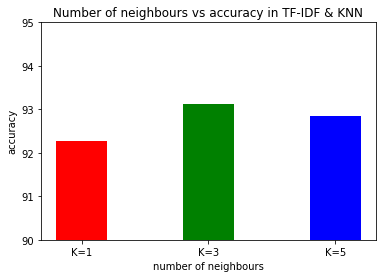

In [0]:
## Cell 20##

## give value of accuracy in list y [] to plot graph for "Number of neighbours vs accuracy in TF-IDF & KNN"  ###

import matplotlib.pyplot as plt 


x=[1,3,5]
y=[92.28,93.12,92.84]  
tick_label = ['K=1', 'K=3', 'K=5'] 

plt.bar(x,y, tick_label = tick_label, 
		width = 0.8, color = ['red', 'green','blue']) 


plt.xlabel('number of neighbours') 

plt.ylabel('accuracy') 

plt.title('Number of neighbours vs accuracy in TF-IDF & KNN') 
plt.ylim(90,95) 
#plt.xlim(1,8) 

plt.show() 
